In [128]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy import special
import mpmath as mp
%matplotlib inline

In [129]:
import classy
from classy import Class

In [130]:
LambdaCDM = Class()
#LambdaCDM.set({'omega_b':0.022383,'omega_cdm':0.12011,'h':0.6732,'ln10^{10}A_s':3.0448,'n_s':0.96605,'tau_reio':0.0543})
LambdaCDM.set({'output':'tCl'})
LambdaCDM.set({'gauge':'newtonian'})
LambdaCDM.compute()

In [283]:
l_min = 30
l_max = 500
l = np.arange(l_min, l_max, 1)
def C_ell(theta):
    omega_cdm, h = theta
    LambdaCDM = Class()
    LambdaCDM.set({'omega_cdm':omega_cdm,'h':h})
    LambdaCDM.set({'output':'tCl'})
    LambdaCDM.compute()
    cl = LambdaCDM.raw_cl(l_max)
    return cl['tt'][l_min:l_max]

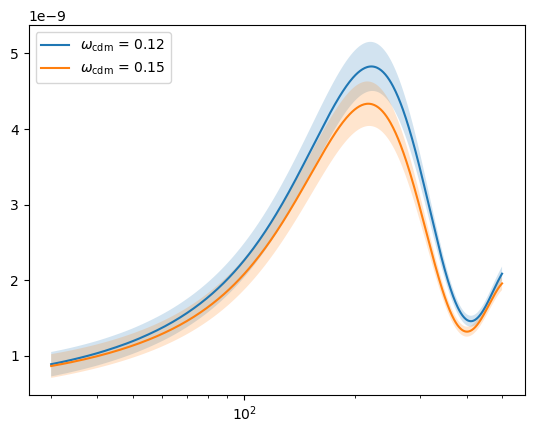

In [284]:
theta_0 = 0.12, 0.67
C_ell_0 = C_ell(theta_0)

theta_1 = 0.15, 0.67
C_ell_1 = C_ell(theta_1)

plt.plot(l, l*(l + 1)*C_ell_0, label = '$\omega_{\\rm cdm}$ = '+ f'{theta_0[0]}')
plt.fill_between(l, l*(l + 1)*C_ell_0*(1 + np.sqrt(2/(2*l + 1))),  l*(l + 1)*C_ell_0*(1 - np.sqrt(2/(2*l + 1))), alpha = 0.2)


plt.plot(l, l*(l + 1)*C_ell_1, label = '$\omega_{\\rm cdm}$ = '+ f'{theta_1[0]}')
plt.fill_between(l, l*(l + 1)*C_ell_1*(1 + np.sqrt(2/(2*l + 1))),  l*(l + 1)*C_ell_1*(1 - np.sqrt(2/(2*l + 1))), alpha = 0.2)

plt.legend()
plt.xscale('log')

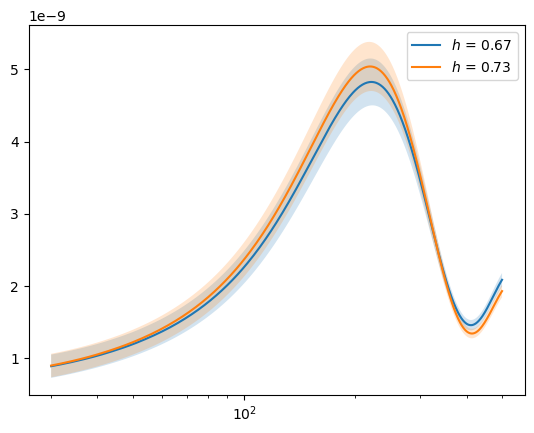

In [285]:
theta_0 = 0.12, 0.67
C_ell_0 = C_ell(theta_0)

theta_1 = 0.12, 0.73
C_ell_1 = C_ell(theta_1)
plt.plot(l, l*(l + 1)*C_ell_0, label = '$h$ = '+ f'{theta_0[1]}')
plt.fill_between(l, l*(l + 1)*C_ell_0*(1 + np.sqrt(2/(2*l + 1))),  l*(l + 1)*C_ell_0*(1 - np.sqrt(2/(2*l + 1))), alpha = 0.2)


plt.plot(l, l*(l + 1)*C_ell_1, label = '$h$ = '+ f'{theta_1[1]}')
plt.fill_between(l, l*(l + 1)*C_ell_1*(1 + np.sqrt(2/(2*l + 1))),  l*(l + 1)*C_ell_1*(1 - np.sqrt(2/(2*l + 1))), alpha = 0.2)

plt.legend()
plt.xscale('log')

In [286]:
def log_prior(theta):
    omega_cdm, h = theta
    if omega_cdm<0.20 and omega_cdm>0 and h<0.83 and h>0.5:
        return 0.
    else:
        return -np.infty
    
def log_probability(theta, C_ell_meas, dC_ell_meas):
    lp = log_prior(theta)
    
    if not np.isfinite(lp):
        return -np.inf
    else:
        C_ell_th = C_ell(theta)
        return - lp - 0.5*np.sum(((C_ell_th - C_ell_meas)/dC_ell_meas)**2)


In [288]:
'''import emcee
nwalkers = 10
ndim = 2

p0 = np.zeros(2)

theta_0 = 0.12, 0.67
p0[0] = 0.01; p0[1] = 0.70; 
C_ell_meas = C_ell(theta_0)
dC_ell_meas = C_ell_meas*np.sqrt(2/(2*l + 1))

pos = p0*(1  + 0.1*np.random.rand(nwalkers, ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=[C_ell_meas, dC_ell_meas])
sampler.run_mcmc(pos, 1000, progress=True);'''

'import emcee\nnwalkers = 10\nndim = 2\n\np0 = np.zeros(2)\n\ntheta_0 = 0.12, 0.67\np0[0] = 0.01; p0[1] = 0.70; \nC_ell_meas = C_ell(theta_0)\ndC_ell_meas = C_ell_meas*np.sqrt(2/(2*l + 1))\n\npos = p0*(1  + 0.1*np.random.rand(nwalkers, ndim))\nsampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=[C_ell_meas, dC_ell_meas])\nsampler.run_mcmc(pos, 1000, progress=True);'

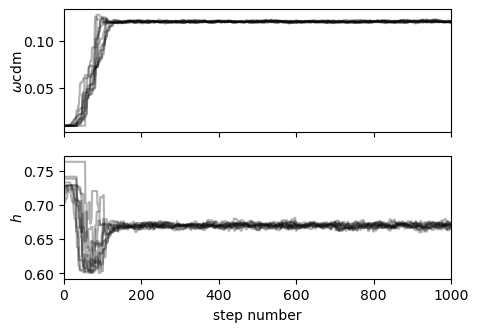

In [ ]:
'''fig, axes = plt.subplots(2, figsize=(5, 3.5), sharex=True)
samples = sampler.get_chain()
labels = ["$\omega{\\rm cdm}$ ", "$h$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");'''

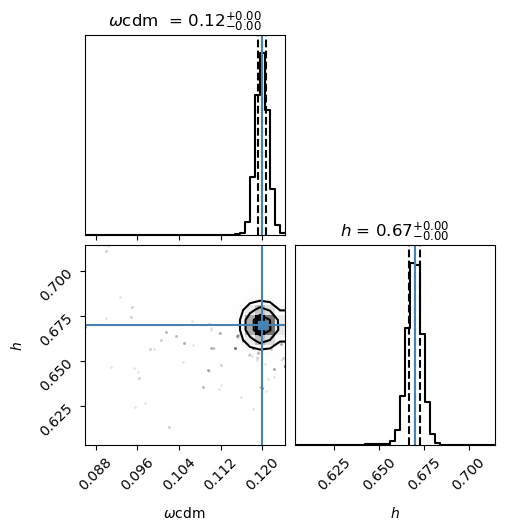

In [ ]:
'''import corner
samples = sampler.get_chain(discard=100, thin=1, flat=True)

fig = corner.corner(
    samples, 
    labels=labels, truths=theta_0,
    quantiles=[0.16, 0.5, 0.84],
    hist_bin_factor = 2,
    show_titles=True,
    smooth = True,
    smooth1d=True,
    title_kwargs={"fontsize": 12},
);'''

Removed no burn in


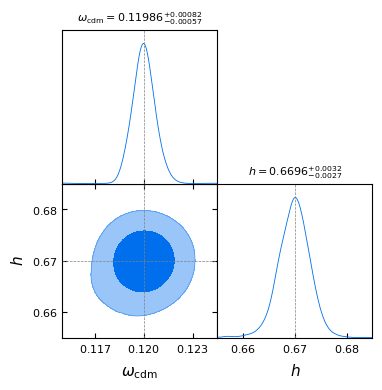

In [ ]:
'''import getdist
from getdist import plots, MCSamples
names = ["omega_cdm", "h"]
labels = ["\\omega_{\\rm cdm}", "h"]
samples_getdist = MCSamples(samples=samples, settings = {'smooth_scale_2D':1.5, 'smooth_scale_1D':3.5}, ranges={'omega_cdm':(0.115,13), 'h':(0.655, 0.685)}, names = names, labels = labels)

g = plots.get_subplot_plotter()
g.triangle_plot(samples_getdist, filled = True, title_limit=1, markers={'omega_cdm':theta_0[0], 'h':theta_0[1]})
g.export('MCMC_cmb.pdf')'''

In [535]:
from astropy.io import fits
import healpy as hp
planck_data = fits.open('/home/johnny/Documents/PhD/Advanced Cosmo Project/COM_CMB_IQU-commander_2048_R3.00_full.fits')
t_data = planck_data[1].data['I_STOKES_INP'] 
t_beam = planck_data[2].data['INT_BEAM'] # effective beam transfer function
t_map = hp.pixelfunc.ud_grade(t_data, nside_out=1024, order_in='NESTED', order_out='RING')
t_mask = planck_data[1].data['TMASK']
t_mask = hp.pixelfunc.ud_grade(t_mask, nside_out=1024, order_in='NESTED', order_out='RING')

In [536]:
map_masked = hp.ma(t_map)
map_masked.mask = np.logical_not(t_mask)

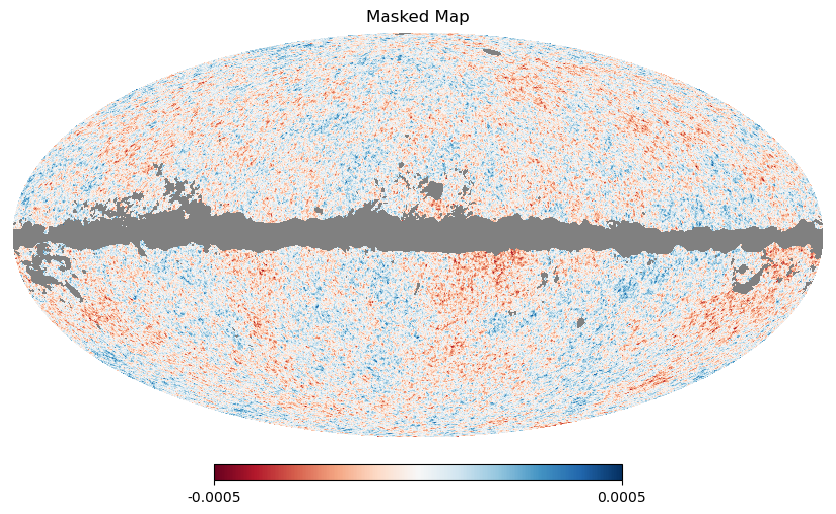

In [537]:
hp.visufunc.mollview(map_masked, min = -5e-4, max = 5e-4, title='Masked Map', cmap = 'RdBu')

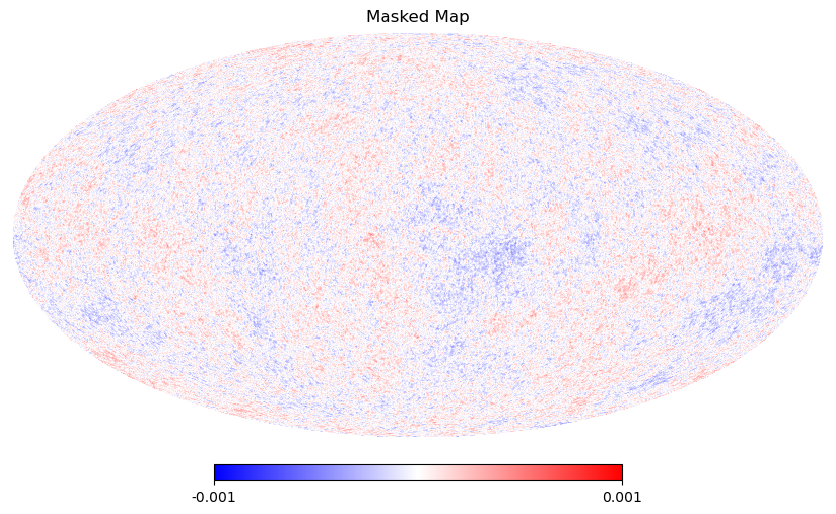

In [538]:
hp.visufunc.mollview(t_map, min = -1e-3, max = 1e-3, title='Masked Map', cmap = 'bwr')

In [539]:
f_sky = np.size(map_masked.compressed())/np.size(map_masked)
f_sky

0.8887998263041178

In [540]:
def C_ell(theta, l_min, l_max):
    omega_cdm, h = theta
    LambdaCDM = Class()
    LambdaCDM.set({'omega_b':0.022383,'omega_cdm':omega_cdm,'h':h,'ln10^{10}A_s':3.0448,'n_s':0.96605,'tau_reio':0.0543})
    LambdaCDM.set({'output':'tCl'})
    LambdaCDM.compute()
    cl = LambdaCDM.raw_cl(l_max)
    return cl['tt'][l_min:l_max]

In [541]:
k2muK = 1e6

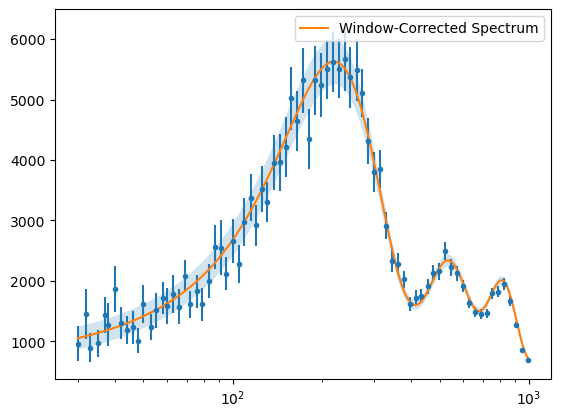

In [ ]:

l_min = 30
l_max = 1000
l = np.arange(l_min, l_max, 1)

t_cl = hp.anafast(t_map, lmax = l_max, pol = False, use_pixel_weights=True)
a_lm_data = hp.map2alm(t_map, lmax = l_max, pol = False, use_pixel_weights=True)

def a_lm_scalar(l_max, ll, m):
    if(m<0):
        return np.conjugate(a_lm_data[hp.Alm.getidx(l_max, ll, -m)])
    else:
        return (a_lm_data[hp.Alm.getidx(l_max, ll, m)])
a_lm = np.vectorize(a_lm_scalar)

dC_ell = np.zeros_like(t_cl)
D_ell = np.zeros_like(t_cl)
dD_ell = np.zeros_like(t_cl)
for ll in range(l_min, l_max):
    dC_ell[ll] = 2*np.std(np.absolute(a_lm(l_max, ll, np.arange(0, ll , 1)))**2)/np.sqrt(2*ll)

C_ell_0 = C_ell(theta_0, l_min, l_max)
D_ell[l_min:l_max] = l*(l + 1)*k2muK**2*t_cl[l_min:l_max]/2/np.pi
dD_ell[l_min:l_max] =  l*(l + 1)*k2muK**2*dC_ell[l_min:l_max]/2/np.pi
ll_down = 1 + np.int_(np.concatenate((10**np.arange(np.log10(l_min), np.log10(30), 0.05), 10**np.arange(np.log10(30), np.log10(l_max), 0.02))))


plt.errorbar(ll_down, D_ell[ll_down], dD_ell[ll_down], fmt='.', alpha = 1)
#plt.errorbar(l, D_ell[l], dD_ell[l], fmt='.', alpha = 1)
T_cmb = 2.725
plt.plot(l, T_cmb**2*l*(l + 1)*k2muK**2*C_ell_0*t_beam[l_min:l_max]**2/2/np.pi, label = 'Window-Corrected Spectrum')
plt.fill_between(l, T_cmb**2*l*(l + 1)*k2muK**2*C_ell_0*(1 + np.sqrt(2/(2*l + 1)))*t_beam[l_min:l_max]**2/2/np.pi,  T_cmb**2*l*(l + 1)*k2muK**2*C_ell_0*(1 - np.sqrt(2/(2*l + 1)))*t_beam[l_min:l_max]**2/2/np.pi, alpha = 0.2)

plt.xscale('log')
plt.legend()

In [713]:
C_ell_measured = t_cl[l_min:l_max]/(T_cmb**2)
dC_ell_measured = dC_ell[l_min:l_max]/(T_cmb**2)

In [ ]:
def log_prior(theta):
    omega_cdm, h = theta
    if omega_cdm<0.20 and omega_cdm>0 and h<0.83 and h>0.5:
        return 0.
    else:
        return -np.infty
    
def log_probability(theta, l_min, l_max, C_ell_meas, dC_ell_meas):
    lp = log_prior(theta)
    
    if not np.isfinite(lp):
        return -np.inf
    else:
        C_ell_th = C_ell(theta, l_min, l_max)*(t_beam[l_min:l_max]**2)
        return - lp - 0.5*np.sum(((C_ell_th - C_ell_meas)/dC_ell_meas)**2)

In [ ]:
import emcee
nwalkers = 4
ndim = 2

p0 = np.zeros(2)

p0[0] = 0.10; p0[1] = 0.65; 

pos = p0*(1  + 0.1*np.random.rand(nwalkers, ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=[l_min, l_max, C_ell_measured, dC_ell_measured])
sampler.run_mcmc(pos, 1000, progress=True);

 30%|███       | 304/1000 [10:12<21:35,  1.86s/it]

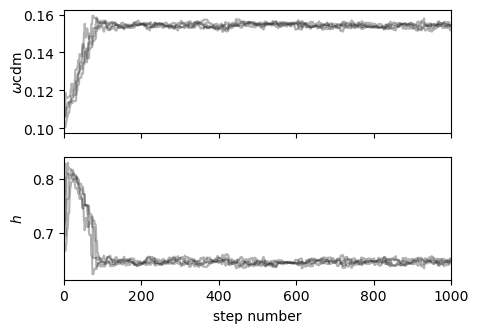

In [ ]:
fig, axes = plt.subplots(2, figsize=(5, 3.5), sharex=True)
samples = sampler.get_chain()
labels = ["$\omega{\\rm cdm}$ ", "$h$"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

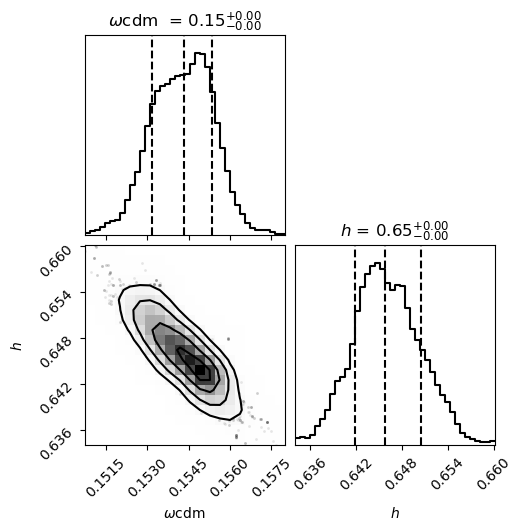

In [ ]:
import corner
samples = sampler.get_chain(discard=200, thin=1, flat=True)

fig = corner.corner(
    samples, 
    labels=labels, truths=theta_0,
    quantiles=[0.16, 0.5, 0.84],
    hist_bin_factor = 2,
    show_titles=True,
    smooth = True,
    smooth1d=True,
    title_kwargs={"fontsize": 12},
);

Removed no burn in


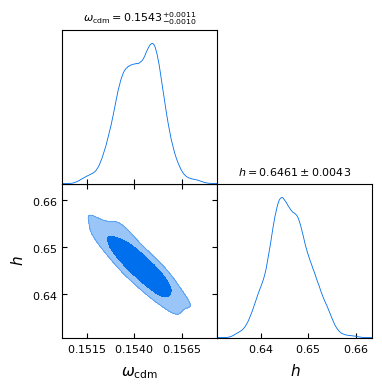

In [ ]:
from getdist import plots, MCSamples
names = ["omega_cdm", "h"]
labels = ["\\omega_{\\rm cdm}", "h"]
samples_getdist = MCSamples(samples=samples, settings = {'smooth_scale_2D':5.5, 'smooth_scale_1D':3.5}, names = names, labels = labels)

g =plots.get_subplot_plotter()
g.triangle_plot(samples_getdist, filled = True, title_limit=1, markers={'omega_cdm':0.12, 'h':theta_0[1]})
g.export('MCMC_cmb.pdf')

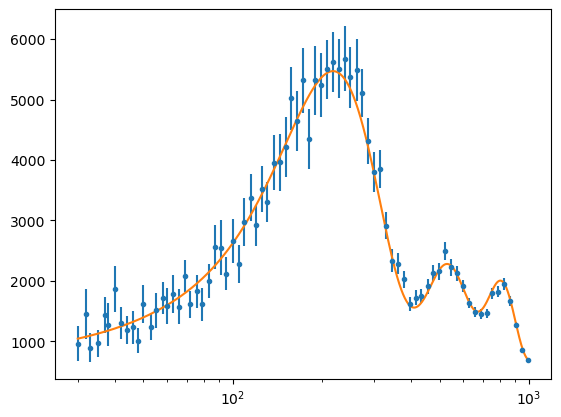

In [ ]:

C_ell_1 = C_ell([0.11, 0.75], l_min, l_max)
C_ell_2 = C_ell([0.127, 0.676], l_min, l_max)
plt.errorbar(ll_down, D_ell[ll_down], dD_ell[ll_down], fmt='.', alpha = 1)
#plt.errorbar(l, D_ell[l], dD_ell[l], fmt='.', alpha = 1)
T_cmb = 2.725
#plt.plot(l, T_cmb**2*l*(l + 1)*k2muK**2*C_ell_1*t_beam[l_min:l_max]**2/2/np.pi)
plt.plot(l, T_cmb**2*l*(l + 1)*k2muK**2*C_ell_2*t_beam[l_min:l_max]**2/2/np.pi)

plt.xscale('log')
